In [72]:
import sys
import data_parser as dp
import pandas as pd
import numpy as np
from time import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy import stats
import joblib
import matplotlib.pyplot as plt

In [ ]:
sys.path.insert(0,"../data/")
sys.path.insert(0,"../")
sys.path.insert(0,"../tools/")

In [8]:
jain_data = "../data/Jain_Ab_dataset.csv"
light, heavy, temp = dp.data_extract_Jain(jain_data)

df = pd.read_csv("bert_df.csv")

In [16]:
X = df
Y = temp

In [48]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = [1.0, 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 7)

In [76]:
regr = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator=regr,
                               param_distributions=random_grid, n_iter=500,
                               cv=3, verbose=2, n_jobs=-1)


search_start = time()
rf_random.fit(x_train, y_train)
search_end = time()

search_duration = search_end-search_start
print ('Time taken for search: ', search_duration)


Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Time taken for search:  439.0128483772278


In [80]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = mean_absolute_error(test_labels, predictions)
    r2 = stats.pearsonr(predictions, test_labels)
    print('Model Performance\n---------------------')
    print('Average Error: {:0.2f} degrees.'.format(np.mean(errors)))

    return 'Pearson Coeff: {:0.2f}'.format(r2[0])



best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)

print (random_accuracy)


Model Performance
---------------------
Average Error: 4.65 degrees.
Pearson Coeff: 0.38


In [58]:
joblib.dump(rf_random, "../models/ab_rf_10122022_057.joblib")

['../models/ab_rf_10122022_057.joblib']

In [59]:
best_random.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 110,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [61]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
62,-93.283170,-31.257544,5.320843,-176.206200,16.669098,3.463486,-16.062637,-76.490060,8.366891,-58.497757,...,36.230720,143.643600,74.278690,-32.514412,18.338978,39.967434,161.394900,77.871500,-120.457470,35.330470
45,-49.666286,2.588172,-50.916534,34.177864,170.800630,15.650633,-62.478462,-23.418510,-54.979675,-92.607280,...,-51.291355,161.276460,-2.786239,24.615454,-52.988018,62.522434,111.837470,111.975820,-8.722493,135.804820
40,-44.546677,29.012033,-123.412766,-89.599520,154.027040,-6.548980,35.083590,32.683820,-6.721425,-33.329100,...,-187.312270,177.841250,11.062798,78.902310,-14.425922,41.344784,31.524773,123.625490,-72.262250,117.567566
88,-74.909850,-138.545520,-230.926420,-117.099070,63.163890,11.349752,91.094910,-5.877485,-129.198640,-41.716770,...,-125.887180,292.187400,-46.245438,141.871660,-130.025830,-3.149591,47.233395,239.912930,-4.271308,156.534680
128,-60.797110,40.293266,3.711317,-66.300026,108.855420,55.293514,1.247531,-30.511644,22.430088,-151.146510,...,-35.183140,99.817260,47.089405,34.589250,27.819365,119.495865,118.512730,111.809814,-9.486401,94.061310
66,-52.692825,-1.147656,-91.656550,-104.528946,186.946700,55.274113,-102.970920,-38.613890,-43.137917,-54.882120,...,-79.564644,143.874370,35.382970,111.540140,62.009430,85.230934,-10.590404,105.346214,69.514660,42.230820
32,-14.743470,12.224974,-36.037140,-104.661850,87.395630,24.617292,-55.787354,-8.794777,54.567570,177.215960,...,-96.315950,6.616922,-169.879710,-7.150207,78.981050,-37.497230,-180.371060,31.409012,59.856410,55.159523
77,-19.210888,-78.966960,-171.125870,-124.615180,70.221580,-82.164950,-25.305122,-90.758690,-38.014046,-66.912740,...,-32.542328,122.257730,119.422485,88.746110,76.874770,39.700317,-84.063934,-3.139558,-82.598260,131.511920
136,-35.136612,13.942934,-232.626600,-166.056300,154.983540,-53.910423,130.330550,-82.391846,-33.397070,1.179163,...,-175.148030,329.654800,-101.614790,68.854870,-124.231926,-68.369520,149.392580,306.584300,-72.695656,173.540160
107,-137.779430,75.843414,-23.672703,-43.357006,113.302110,11.862781,-83.888720,-29.873650,11.085556,-72.408490,...,-97.557400,138.126980,76.553110,69.268600,-38.474070,57.447037,16.236015,36.140385,-11.467193,30.456678


In [78]:
print(best_random.predict(x_test.loc[[62]]))
print(y_test[0])

[70.65666667]
69.5


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
62,-93.28317,-31.257544,5.320843,-176.2062,16.669098,3.463486,-16.062637,-76.49006,8.366891,-58.497757,...,36.23072,143.6436,74.27869,-32.514412,18.338978,39.967434,161.3949,77.8715,-120.45747,35.33047


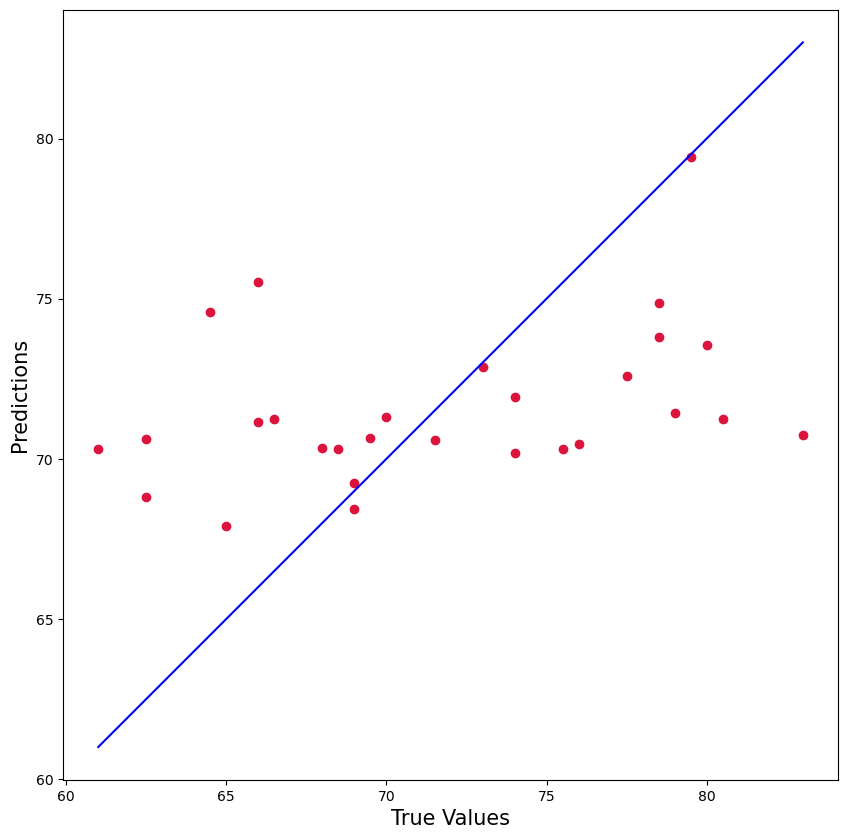

In [79]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, best_random.predict(x_test), c='crimson')

p1 = max(max(best_random.predict(x_test)), max(y_test))
p2 = min(min(best_random.predict(x_test)), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()
